In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/thompsong/Dropbox/PROFESSIONAL/RESEARCH/3 Project Documents/USFprojects/202201_Tonga/Hunga_Tonga_Lightning_within_300km_December-January.csv')

In [2]:
df.columns

Index(['time', 'longitude', 'latitude', 'signalStrengthKA', 'cloud',
       'distanceM'],
      dtype='object')

In [ ]:
from datetime import datetime 
import obspy
t = [obspy.UTCDateTime(dt) for dt in df['time']]

In [19]:
t2 = [this_t.datetime for this_t in t]

In [21]:
df['datetime'] = t2

In [22]:
print(df)

                            time  longitude  latitude  signalStrengthKA  \
0       2021-12-19T07:57:20.604Z  -176.6048  -18.7239              14.9   
1       2021-12-19T07:57:20.637Z  -176.6086  -18.6811              39.2   
2       2021-12-19T08:20:14.185Z  -176.7946  -18.7432             114.8   
3       2021-12-19T20:41:19.648Z  -175.3759  -20.5527               3.7   
4       2021-12-19T20:41:26.619Z  -175.3727  -20.5514               6.4   
...                          ...        ...       ...               ...   
721486  2022-01-15T22:27:42.596Z  -175.2492  -20.6610             -55.9   
721487  2022-01-15T22:27:42.725Z  -175.2303  -20.6520             -43.0   
721488  2022-01-15T22:27:42.782Z  -175.2284  -20.6659              -9.8   
721489  2022-01-15T22:27:42.891Z  -175.2273  -20.6560             -13.3   
721490  2022-01-15T22:27:42.982Z  -175.2248  -20.6601             -22.5   

        cloud  distanceM                datetime  
0        True     238747 2021-12-19 07:57:20.604

In [41]:
weightedCurrent = []
for i, row in df.iterrows():
    #print(row)
    try:
        weightedCurrent.append(row['signalStrengthKA']/row['distanceM'])
    except:
        pass

df['weightedCurrent'] = weightedCurrent                            

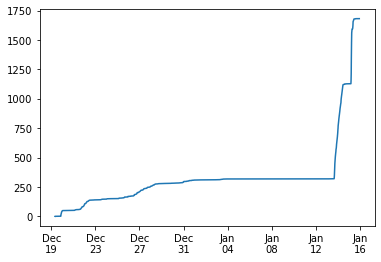

In [42]:
import matplotlib.dates as mdates 
fig, ax = plt.subplots()
#ax.plot_date(df['datetime'], np.cumsum(np.abs(df['signalStrengthKA'])), '-')
ax.plot_date(df['datetime'], np.cumsum(np.abs(df['weightedCurrent'])), '-')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%d'))

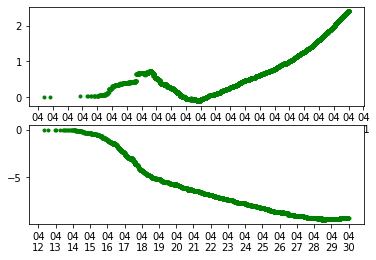

In [75]:
df2 = df.loc[(df['datetime'] >= '2022-01-15') & (df['datetime']<='2022-01-15 04:30:00')]

fig, ax = plt.subplots(2,1)
#ax.plot_date(df['datetime'], np.cumsum(np.abs(df['signalStrengthKA'])), '-')
df3 = df2.loc[df2['cloud']==True]
df4 = df2.loc[df2['cloud']==False]
x = [None, None]
y = [None, None]
x[0] = df3['datetime']
x[1] = df4['datetime']
y[0] = np.cumsum(df3['weightedCurrent'])
y[1] = np.cumsum(df4['weightedCurrent'])
for c in range(len(ax)):
    
    ax[c].plot_date(x[c], y[c], 'g.')
    ax[c].xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
    ax[c].xaxis.set_major_formatter(mdates.DateFormatter('%H\n%M'))

#ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90);

In [59]:
df2.head(100)

,time,longitude,latitude,signalStrengthKA,cloud,distanceM,datetime,weightedCurrent
329433,2022-01-15T04:09:24.700Z,-175.4219,-20.6038,11.7,True,8608,2022-01-15 04:09:24.700,0.001359
329434,2022-01-15T04:09:49.213Z,-175.3933,-20.5441,10.0,True,1482,2022-01-15 04:09:49.213,0.006748
329435,2022-01-15T04:11:48.590Z,-175.3893,-20.5446,17.4,True,1222,2022-01-15 04:11:48.590,0.014239
329436,2022-01-15T04:12:19.789Z,-175.3980,-20.5477,3.9,True,2114,2022-01-15 04:12:19.789,0.001845
329437,2022-01-15T04:12:20.002Z,-175.3969,-20.5658,-4.0,False,3659,2022-01-15 04:12:20.002,-0.001093
...,...,...,...,...,...,...,...,...
329528,2022-01-15T04:14:04.970Z,-175.4001,-20.5249,-14.1,False,2253,2022-01-15 04:14:04.970,-0.006258
329529,2022-01-15T04:14:07.077Z,-175.4265,-20.5222,-5.3,False,4881,2022-01-15 04:14:07.077,-0.001086
329530,2022-01-15T04:14:07.336Z,-175.3286,-20.6598,3.6,True,14846,2022-01-15 04:14:07.336,0.000242
329531,2022-01-15T04:14:07.850Z,-175.2895,-20.4753,6.7,True,11763,2022-01-15 04:14:07.850,0.000570
